In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

file_path = r"../data/hotel_bookings.csv"
data = pd.read_csv(file_path)
#  查看数据的行、列
print(data.shape)

(119390, 32)


In [3]:
# 查看数据非空数据量
data.count()

# NAN统计,county、agent、company、children中这四列出现nan数据
data.isna().sum() 

# # 数据整体描述
# data.describe()

# # 数据信息
# data.info()

# # 简单查看一下数据
# data.head()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 数据缺失值查询与处理 
通过describe()方法看出：

children 这一列少了4个值，且均值，4分位值均为0，因此填充为0值

country、agent、company：缺失值较多，分别为488，16340，112593。

其中agent为个人用户，填充0；其余两列进行删除，后期可以考虑单独填充

In [4]:
# # df1 为去除nan列数据
df1 = data.drop(["country", "company"],axis=1)
df1.shape

# 填充nan
df1["children"].fillna(0,inplace=True)
df1["agent"].fillna(0,inplace=True)

# 查看填充后的结果,无nan列
a = df1.isna().sum()
print(a)
print(df1.shape)

'''均值填充含nan的列
for column in list(df.columns[df.isnull().sum() > 0]):

mean_val = df[column].mean()

df[column].fillna(mean_val, inplace=True)'''
""
# list_col = list(data.columns[data.isnull().sum()>0])
# for col in  list_col:
#     print(col,list_col.index(col),"type:",type(col))

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

''

### 数据查重并处理

In [5]:
# 查询重复行数,此方法不算第一次出现“重复行”，
# 只拿后面的行往前比，所以第一次出现的内容就不算重复行，比如一行重复了3次，那↓方法反馈sum()=2
print(df1.duplicated().sum())

# 查看哪些记录出现重复值
rep_rows = df1[df1.duplicated(keep=False)].shape[0]
print(rep_rows)

# 查看哪些重复的值，其实数量特别多，没啥意义
df1[df1.duplicated(keep=False)]

33762
42483


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,2015-07-05
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,2015-07-05
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,0,No Deposit,42.0,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [6]:
# df1 = pd.read_csv("hotel_demand_df1.csv") git没保存源代码，之前我已经将数据去重复值并进行单独保存
# 此处复现去重操作
df1.drop_duplicates(keep="first",inplace=True)
print("去重后：",df1.shape)

去重后： (85628, 30)


### 异常值发现并处理

In [7]:
# 针对数据进行异常值筛查
# 1.预定没有取消，但周中和周末天数综合=0,即客人当天入住当天退房，暂且不删除
no_days = df1[df1["is_canceled"]+df1["stays_in_weekend_nights"]+df1["stays_in_week_nights"]==0]
# 2.预定没有取消，但客人数量从成人、儿童、婴儿总和为0
no_guest = df1[df1["is_canceled"]+df1["adults"]+df1["children"]+df1["babies"]==0].index # 获取异常值index
# print(type(no_guest)) # 没有取消但是并没有人来，因此是异常值
df1.drop(no_guest,inplace=True)
# print(df1.shape)

In [8]:
df1["meal"].unique() # 可以查看这一列有哪些值
df1["meal"].value_counts() # 可以查看这一列各类数值的求和
# 通过meal这一列维度的定义，可以发现undefined 和 SC相同，因此进行替换
df1["meal"].replace("Undefined","SC",inplace=True)
df1["meal"].value_counts() # 处理后的结果

BB    66483
SC     9752
HB     8885
FB      359
Name: meal, dtype: int64

In [19]:
from matplotlib import font_manager
# 为画图做准备
warnings.filterwarnings("ignore")

# 设置中文字体类型
# Mac
# my_font = font_manager.FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=10)
# Windows
my_font = font_manager.FontProperties(fname=r'C:\Windows\Fonts\simsun.ttc',size=10)
# 使用中文字体显示
plt.rcParams["font.sans-serif"] = "PingFang"
# 正常显示负数
plt.rcParams["axes.unicode_minus"] = False
pd.set_option("display.max_columns",36)

## 酒店基本情况分析
对取消的订单进行处理，即排除被取消的预定需求

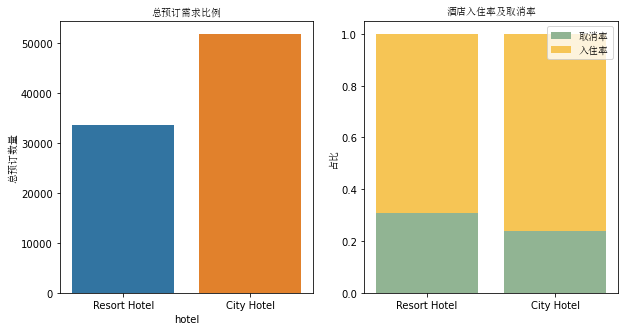

In [29]:
# 1.总订单量的分析
# 1.1 对比两类酒店，取消订单与未取消订单，loc方法本身需要传[“行”，“列”]参数，既可以是数值也可以是名称
nocancel_data = df1.loc[df1["is_canceled"]==0] # loc方法可以采用条件筛选
cancel_data = df1.loc[df1["is_canceled"]==1]
# nocancel_data.head()
# nocancel_data_hotel = df1.loc[df1["is_canceled"]==0,["hotel","is_canceled"]] # 条件 + 列名
# nocancel_data_hotel.head()

# 非取消占比,分别用城市酒店与度假酒店进行数据对比
nocancel_percent = nocancel_data["hotel"].value_counts()/df1["hotel"].value_counts() # series类型
nocancel_percent_2list = list(nocancel_percent)
cancel_percent = cancel_data["hotel"].value_counts()/df1["hotel"].value_counts() # series类型
cancel_percent_2list = list(cancel_percent) # 之所以变成list类型，因为下面画图参数需要

fig,axes = plt.subplots(1,2,figsize=(10,5))
ax1 = sns.countplot(x="hotel",data=df1,ax=axes[0]) 
# countplot(),是计数画图工具，在第0张画布上，x方向代表hotel，hotel必须是后面data的列元素，data是要统计的数据，
# 整体理解：以df1作为data数据，从data中抽取“hotel”，进行分类和统计，最终画在axes[0]这张画布上

ax1.set_title("总预订需求比例",fontproperties=my_font)
ax1.set_ylabel("总预订数量",fontproperties=my_font)

ax2 = plt.bar([1,2],cancel_percent_2list,tick_label=["Resort Hotel","City Hotel"],color="#91b493",label="取消率")
# plt.bar([x轴坐标范围]，数据内容，x轴坐标注释（显示），bar颜色，label图例注释)，其中数据内容是关键
ax2 = plt.bar([1,2],nocancel_percent_2list,bottom=cancel_percent_2list,color="#F6C555",label="入住率")
plt.title("酒店入住率及取消率",fontproperties=my_font)
plt.ylabel("占比",fontproperties=my_font)
plt.legend(prop=my_font)

### 从上图可以看出，城市酒店比度假酒店的总预定量要大，
### 对比入住/取消率可以看出城市酒店的入住率要更高，这可能与城市酒店所在的区域以及满足人们需求的各项功能相关

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


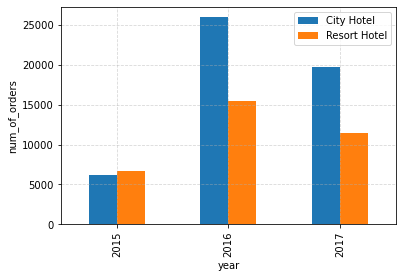

In [11]:
# 2.最简单的统计分析，2015-2017年两类酒店每年预订的总数是多少
# 按照hotel和arrival_date_year来进行分组,并hotel这列计数
group_by_hotel_year = df1.groupby(["hotel","arrival_date_year"])["hotel"].count()
# print(group_by_hotel_year.count())
# print(type(group_by_hotel_year))
# print(group_by_hotel_year)

C_2015 = group_by_hotel_year["City Hotel"][2015]
groups_by_h_y = df1.groupby(["hotel","arrival_date_year"])
# 定义年份和订单总量，两个列表
years = list()
hotel_orders_total_count = list()
for hotel,group in groups_by_h_y:
#     print(hotel)
    years.append(hotel[1])
#     print("-"*40)
#     print(group["arrival_date_year"].count())
    hotel_orders_total_count.append(int(group["arrival_date_year"].count()))
# print(years[:3])
# print(hotel_orders_total_count)
years = years[:3]
City_Hotel_orders = hotel_orders_total_count[:3]
Resort_Hotel_orders = hotel_orders_total_count[3:]
s = pd.DataFrame(
    {"City Hotel":City_Hotel_orders,
     "Resort Hotel":Resort_Hotel_orders
    },
    index=years
    )
s.plot(kind="bar")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("year")
plt.ylabel("num_of_orders")
plt.show

In [12]:
# 上述图片没有数据标签，不太好看，我们考虑另一种办法添加数据标签
# # 使用hist画直方图
# plt.hist([City_Hotel_orders,Resort_Hotel_orders],bins,label=["City Hotel","Resort Hotel"])
# plt.show()  这一部分比较耽误时间，暂且放置一旁

### 由上图我们可以看出，2015年城市酒店比度假酒店预定量要少，而之后的2016与2017年城市酒店比度假酒店的预定量有明显的增多



In [54]:
# 查看有多少年
# nocancel_data["arrival_date_year"].unique() 显示2015、2016、2017年
# 查看这3年，每月的订单量走势图，
# data_month_2015 = nocancel_data.loc[nocancel_data["arrival_date_year"]==2015]["arrival_date_month"].value_counts()# .value_count()
# print(data_month_2015)
data_month_2015 = nocancel_data.loc[nocancel_data["arrival_date_year"]==2015,["hotel","arrival_date_month"]]
R_month_data = data_month_2015.loc[data_month_2015["hotel"]=='Resort Hotel']["arrival_date_month"].value_counts()
R_month_data.head

<bound method NDFrame.head of August       1001
July          989
October       968
September     896
December      797
November      742
Name: arrival_date_month, dtype: int64>

In [55]:
C_month_data = data_month_2015.loc[data_month_2015["hotel"]=='City Hotel']["arrival_date_month"].value_counts()
C_month_data.head

<bound method NDFrame.head of September    1259
October      1187
August        828
December      764
November      592
July          154
Name: arrival_date_month, dtype: int64>